In [1]:
!pip install key-generator

In [2]:
import os
from base64 import b64encode
import random
import hashlib
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sympy import fwht,ifwht
from key_generator.key_generator import generate
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import secrets
import platform

In [3]:
platform.uname()._asdict()

{'system': 'Linux',
 'node': '16f4fff33933',
 'release': '5.15.133+',
 'version': '#1 SMP Tue Dec 19 13:14:11 UTC 2023',
 'machine': 'x86_64',
 'processor': 'x86_64'}

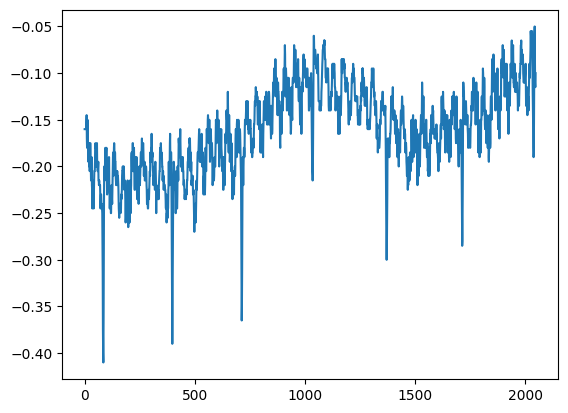

In [4]:
train_df = pd.read_csv("/kaggle/input/mit-bih-arrhythmia-database-modern-2023/101.csv")
train_X = train_df[['time_ms','MLII','V1']]
x = []
for i in range(2048):
    x.append(i)
    
plt.plot(x, train_X[:2048]['V1'].to_list())

In [5]:
p = random.randrange(10**31,10**31+10**30)
q = random.randrange(10**31,10**31+10**30)
A = p*q
A = int(A/20000)
A = str(bin(A))[2:]
len(A)

192

In [6]:
'''B'''
patient_id = generate(2, '', 4, 4, type_of_value = 'int', capital = 'mix', seed = 10).get_key()
B = ''.join(format(i, '08b') for i in bytearray(patient_id, encoding ='utf-8'))

In [7]:
'''C'''
s = platform.uname().node+platform.uname().processor+platform.uname().machine
C = ''.join(format(i, '08b') for i in bytearray(s, encoding ='utf-8'))

In [8]:
'''D'''

patient_name = generate(3, '', 4, 4, type_of_value = 'char', capital = 'mix', seed = 42).get_key()
D_1 = ''.join(format(i, '08b') for i in bytearray(patient_name, encoding ='utf-8'))

s = platform.uname().node
D_2 = ''.join(format(i, '08b') for i in bytearray(s, encoding ='utf-8'))

D = D_1+D_2

In [9]:
'''
    k = 'zxD1Lx2wy+xK65BQUxaFbw=='.encode() #len == 24
    cipher = AES.new(k, AES.MODE_EAX)

    k = b64encode(get_random_bytes(16)).decode('utf-8').encode()
    cipher = AES.new(k, AES.MODE_EAX)

    cipher = AES.new(key, AES.MODE_EAX, nonce)
    data = cipher.decrypt_and_verify(ciphertext, tag).decode()
    
'''

"\n    k = 'zxD1Lx2wy+xK65BQUxaFbw=='.encode() #len == 24\n    cipher = AES.new(k, AES.MODE_EAX)\n\n    k = b64encode(get_random_bytes(16)).decode('utf-8').encode()\n    cipher = AES.new(k, AES.MODE_EAX)\n\n    cipher = AES.new(key, AES.MODE_EAX, nonce)\n    data = cipher.decrypt_and_verify(ciphertext, tag).decode()\n    \n"

In [10]:
# patient_id2 = generate(6, '', 3, 3, type_of_value = 'char', capital = 'mix', seed = 16).get_key()
# patient_id3 = generate(6, '', 3, 3, type_of_value = 'int', capital = 'mix', seed = 42).get_key()

In [11]:
# for key 1
def gen_key(p_id):
    data = str.encode(p_id)

    key = get_random_bytes(16) # key generation 

    cipher = AES.new(key, AES.MODE_EAX)
    ciphertext, tag = cipher.encrypt_and_digest(data)
    nonce = cipher.nonce

    return key, ciphertext, tag, nonce, ascii(ciphertext)

key1, ciphertext, tag, nonce, bits = gen_key(patient_id)
bits_list=list(''.join(format(ord(x), 'b') for x in bits))

In [12]:
# generate key 1

def gen_new_key(p_id,A,B,C,D):
    data = str.encode(p_id)
    
    key1 =""

    for elem in range(len(B)):

        key1+=str(int(A[elem])|int(B[elem])|int(C[elem]))

    hashval = hashlib.md5(b'key1').digest()
    key1_ = str(b64encode(hashval).decode('utf-8').encode())

    key1__ = key1_[2:]
    key1val= key1__[:-1]
    
    key1val = key1val.encode()
    
    cipher = AES.new(key1val, AES.MODE_EAX)
    ciphertext, tag = cipher.encrypt_and_digest(data)
    nonce = cipher.nonce
    
    return key1val, ciphertext, tag, nonce, ascii(ciphertext)

key1_new, ciphertext_new, tag_new, nonce_new, bits_new = gen_new_key(patient_id,A,B,C,D)
bits_list_new=list(''.join(format(ord(x), 'b') for x in bits_new))

In [13]:
key1_new

b'wq3WlL+ULcd7N2WS2chizQ=='

In [14]:
b64encode(key1).decode('utf-8').encode()

b'fIVrQW18+ebyCzbScp/Nmg=='

In [15]:
# key2, ciphertext2, tag2, nonce2, _ = gen_key(patient_id2)
# key3, ciphertext3, tag3, nonce3, _ = gen_key(patient_id3)

# def decode_key(key, ciphertext, tag, nonce):
#     cipher = AES.new(key, AES.MODE_EAX, nonce)
#     data = cipher.decrypt_and_verify(ciphertext, tag)
#     data.decode()
#     return data

In [16]:
#construct multi_D space 


def load_data(path):
    df = pd.read_csv(path)
    df = df[['time_ms','MLII','V1']]
    
    coeff = fwht(df[:2048]['V1'].to_list())
    coeff_ = [i*10000+20 for i in coeff]
    coeff_arr = np.array(coeff_)

    parts = int((len(coeff)-512)/8)
    coeff_arr1 = coeff_arr[parts*0:parts*1].reshape(8,8,3)
    coeff_arr2 = coeff_arr[parts*1:parts*2].reshape(8,8,3)
    coeff_arr3 = coeff_arr[parts*2:parts*3].reshape(8,8,3)
    coeff_arr4 = coeff_arr[parts*3:parts*4].reshape(8,8,3)
    coeff_arr5 = coeff_arr[parts*4:parts*5].reshape(8,8,3)
    coeff_arr6 = coeff_arr[parts*5:parts*6].reshape(8,8,3)
    coeff_arr7 = coeff_arr[parts*6:parts*7].reshape(8,8,3)
    coeff_arr8 = coeff_arr[parts*7:parts*8].reshape(8,8,3)
    
    return coeff_arr1, coeff_arr2, coeff_arr3, coeff_arr4, coeff_arr5, coeff_arr6, coeff_arr7, coeff_arr8
    
arr1, arr2, arr3, arr4, arr5, arr6, arr7, arr8 = load_data("/kaggle/input/mit-bih-arrhythmia-database-modern-2023/101.csv")

arr_li = [arr1, arr2, arr3, arr4, arr5, arr6, arr7, arr8]

In [17]:
#template 2 numbers
x2 = [int(i) for i in '74568123']
x2 = [i-1 for i in x2]

y2 = [int(i) for i in '76145382']
y2 = [i-1 for i in y2]

z2 = [int(i) for i in '123']
z2 = [i-1 for i in z2]

In [18]:
temp_li=[]
for i in range(len(x2)):
    for j in range(len(y2)):
        for k in range(len(z2)):
            temp_li.append((x2[i], y2[j], z2[k]))

In [19]:
def embed(li,temp_li,bits_li):
    idx = 0
    s=192
    sm=1344
    bl = len(bits_li)
    for i in range(8):
        n = random.randint(0,7)
        x = li[n]
        if n%sm==0:
            s=sm
        else:
            s = n%sm
        for j in temp_li:
            if idx >= bl:
                break
            x[j[0], j[1], j[2]] = float(bits_li[idx])
            idx+=1
    coeff_li = list(np.concatenate(li, axis=0).reshape(8,8,8,3).reshape(1536,))
    coeff_li_ = [(int(i)/10000)-20 for i in coeff_li]
    coeff_li = ifwht([float(i) for i in coeff_li])

    return coeff_li

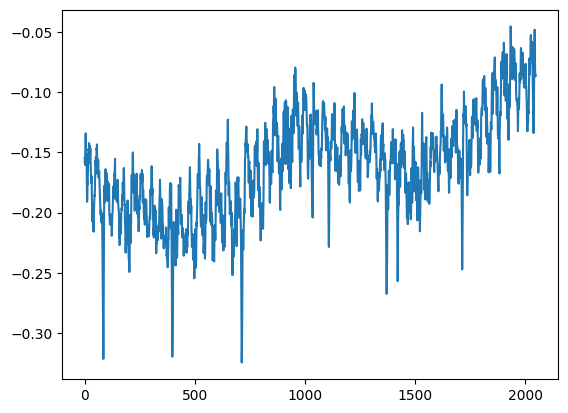

In [20]:
coeff_li = embed(arr_li,temp_li,bits_list)

coeff_li= [i/10000 for i in coeff_li]

x_ = []

for i in range(len(coeff_li)):
    x_.append(i)

plt.plot(x_, coeff_li)

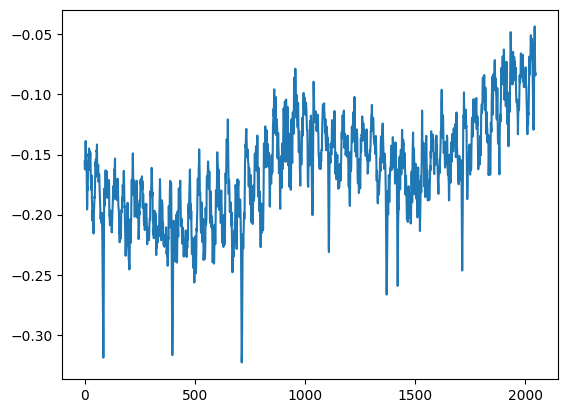

In [21]:
coeff_li = embed(arr_li,temp_li,bits_list_new)

coeff_li= [i/10000 for i in coeff_li]

x_ = []

for i in range(len(coeff_li)):
    x_.append(i)

plt.plot(x_, coeff_li)